In [ ]:
#importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

In [ ]:
#permitindo acesso do drive ao colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/probabilidade_estatistica/populacao_brasileira.csv (1).csv"

In [ ]:
#visualizando as primeiras linhas da nossa base
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


1. Probabilidade complementar de não ser fluente em inglês (nível avançado)

In [ ]:
total_pessoas = len(df)
fluentes = len(df[df['nível de proficiência em inglês'] == 'Avançado'])
prob_fluente = fluentes / total_pessoas
prob_nao_fluente = 1 - prob_fluente

print(f"Probabilidade de não ser fluente: {prob_nao_fluente:.2%}")

Probabilidade de não ser fluente: 65.60%


2. Probabilidade de renda > 5 mil para AL ou PA

In [ ]:
al_pa = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]
alto_renda = len(al_pa[al_pa['renda'] > 5000])
prob = alto_renda / len(al_pa)

print(f"Probabilidade: {prob:.2%}")

Probabilidade: 5.06%


3. Probabilidade de ensino superior no AM e da 5ª pessoa

In [ ]:
amazonenses = df[df['estado'] == 'AM']
superior_am = len(amazonenses[amazonenses['escolaridade'] == 'Superior'])
prob_am = superior_am / len(amazonenses)
prob_quinta = prob_am  # Independente das anteriores

print(f"Probabilidade no AM: {prob_am:.2%}")
print(f"Probabilidade da 5ª pessoa: {prob_quinta:.2%}")

Probabilidade no AM: 23.68%
Probabilidade da 5ª pessoa: 23.68%


4. Faixa de renda predominante e função densidade

In [ ]:
faixas = range(0, int(max(df['renda'])) + 1500, 1500)
hist, bins = np.histogram(df['renda'], bins=faixas)
faixa_predominante = bins[np.argmax(hist)]

print(f"Faixa predominante: R$ {faixa_predominante:,.2f} - R$ {faixa_predominante+1500:,.2f}")

# Função densidade de probabilidade (PDF)
pdf = hist / len(df)

Faixa predominante: R$ 3,000.00 - R$ 4,500.00


5. Média, variância e distribuição normal da renda

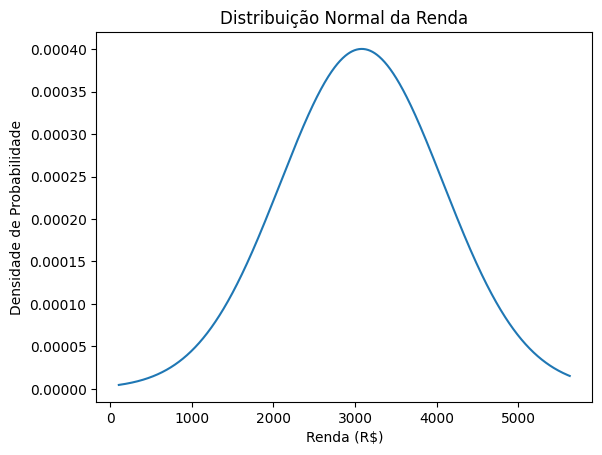

In [ ]:
media = df['renda'].mean()
variancia = df['renda'].var()

# Gerando distribuição normal
x = np.linspace(min(df['renda']), max(df['renda']), 1000)
pdf = norm.pdf(x, media, np.sqrt(variancia))

# Plot
plt.plot(x, pdf)
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de Probabilidade')
plt.show()

6. Probabilidade de 243 mil pós-graduados em 1 milhão

In [ ]:
posgrad = len(df[df['escolaridade'] == 'Pós-graduação'])
p = posgrad / total_pessoas
n = 1_000_000
k = 243_000

# Usando aproximação normal
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
prob = 1 - norm.cdf(k, mu, sigma)

print(f"Probabilidade: {prob:.2%}")

Probabilidade: 100.00%


7. Função de densidade acumulada para escolaridade

In [ ]:
niveis = df['escolaridade'].value_counts(normalize=True).sort_index()
cdf = niveis.cumsum()

print("FDA para Escolaridade:")
print(cdf)

FDA para Escolaridade:
escolaridade
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: proportion, dtype: float64


8. Margem de erro para inglês intermediário

In [ ]:
intermediario = len(df[df['nível de proficiência em inglês'] == 'Intermediário'])
p = intermediario / total_pessoas
n = total_pessoas
z = 1.96  # 95% confiança

margem_erro = z * np.sqrt((p * (1 - p)) / n)

print(f"Margem de erro: {margem_erro:.4f}")

Margem de erro: 0.0291


9. Probabilidade de 60 pessoas com renda > média + 1 mil

In [ ]:
limite = media + 1000
acima = len(df[df['renda'] > limite])
p = acima / total_pessoas
n = total_pessoas
k = 60

# Usando distribuição binomial
prob = binom.pmf(k, n, p)

print(f"Probabilidade: {prob:.4%}")

Probabilidade: 0.0000%


10. Probabilidade para Sudeste: homem, fundamental, renda > 2 mil

In [ ]:
sudeste = df[df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])]
filtro = sudeste[(sudeste['sexo'] == 'M') &
                (sudeste['escolaridade'] == 'Fundamental') &
                (sudeste['renda'] > 2000)]
prob = len(filtro) / len(sudeste)

print(f"Probabilidade: {prob:.2%}")

Probabilidade: 12.10%
